## Homework 5 - Numerical 

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
# time index for the data 
time_index = np.arange(0.01, 1.01, 0.01)

In [4]:
# time incrementing per each value of t
time_increment = time_index[1:] - time_index[:-1]

Simulate 100 paths for the diffusions below on $[0,1]$ using the Euler scheme (see Chapter 7) for a discretization of $0.01$

In [5]:
# standard brownian motion covariance matrix 
bm_cov = np.reshape(np.array([i if i < j else j for j in time_index for i in time_index]), (100,100))

In [6]:
# the standard brownian motion to be implemented 
brownian_motion = np.insert(np.array([np.linalg.cholesky(bm_cov).dot(np.random.normal(loc=0, 
                                                                                      scale=1, 
                                                                                      size=100)) for _ in range(100)]), 
                            obj=0, 
                            values=0,
                            axis=1)

In [7]:
brownian_increments = np.delete(np.roll(brownian_motion,-1) - brownian_motion, obj=100, axis=1)

In [8]:
brownian_increments

array([[ 0.17640523,  0.04001572,  0.0978738 , ...,  0.17858705,
         0.01269121,  0.04019894],
       [ 0.18831507, -0.13477591, -0.1270485 , ...,  0.08235042,
         0.21632359,  0.13365279],
       [-0.03691818, -0.02393792,  0.10996596, ...,  0.05829537,
        -0.0399449 ,  0.03700559],
       ...,
       [-0.00552438,  0.0130643 ,  0.04406911, ...,  0.09722072,
        -0.09189505,  0.06632405],
       [-0.01334914, -0.15663703, -0.17486514, ...,  0.00708476,
         0.24357285,  0.09716812],
       [-0.09329622,  0.28652035, -0.1792048 , ...,  0.05168722,
        -0.00329207,  0.12981114]])

$dS_t = S_tdBt, \ \ S_0 = 1$

In [41]:
a_plot = np.insert(np.cumprod(np.delete(brownian_increments, obj=99, axis=1)+1,axis=1),0,1,axis=1)

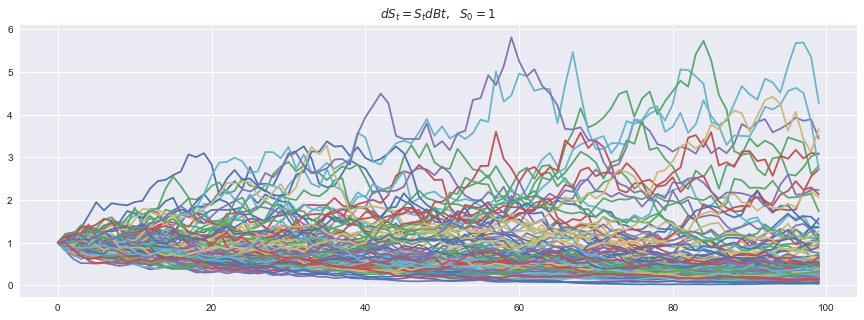

In [42]:
plt.figure(figsize=(15,5))
plt.title("$dS_t = S_tdBt, \ \ S_0 = 1$")
for i in a_plot:
    plt.plot(i)

In [60]:
b_plot = np.insert(np.cumprod(-time_increment+1) + np.delete(brownian_increments, obj=99, axis=1), 0, 1, axis=1)

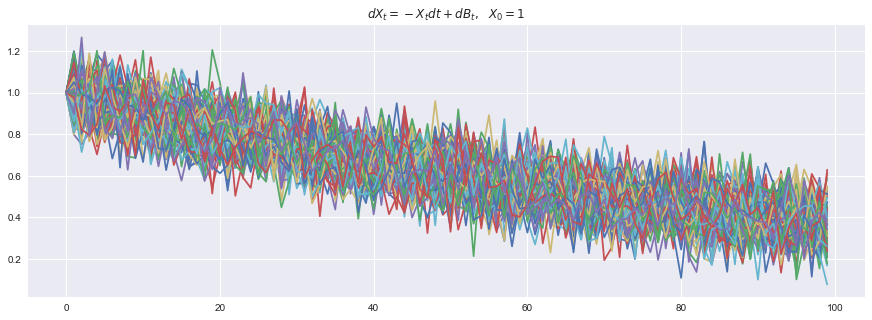

In [61]:
plt.figure(figsize=(15,5))
plt.title("$dX_t = -X_tdt + dB_t, \ \ X_0 = 1$")
for i in b_plot:
    plt.plot(i)

c) $dZ_t = 0.5dt + \sqrt{Z_t}dB_t, \ \ Z_0 = 5$

Discard the path if they become negative here. Out of 100, how many paths are discarded?

In [64]:
c_plot = np.insert(0.5*time_increment + np.cumprod(np.delete(brownian_increments, obj=99, axis=1)+1,axis=1)*5, 0, 5, axis=1)

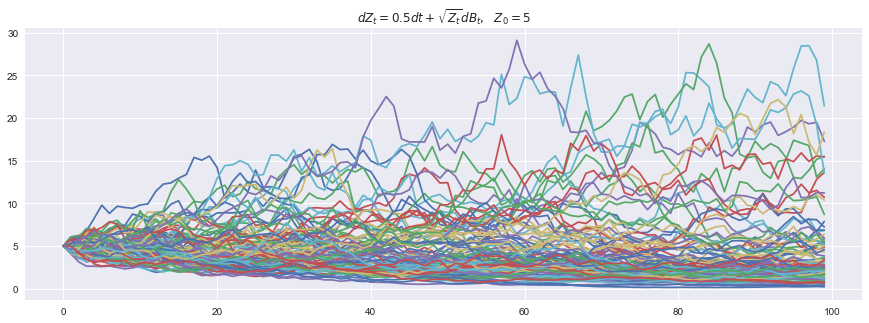

In [65]:
plt.figure(figsize=(15,5))
plt.title("$dZ_t = 0.5dt + \sqrt{Z_t}dB_t, \ \ Z_0 = 5$")
for i in c_plot:
    plt.plot(i)